# Capstone Week 4

# The Best Location To Open A New Ramen Shop In New York City.

# 1. Introduction

## New York City has is the place where is high competition for restaurant businesses.  Every year, new restaurants open, and many restaurants cannot survive the competition and close down for good.  One factor of the successful restaurant business is the location.  Even though the restaurant has an excellent chef and serves excellent food, if the accessibility was good enough, it cannot build enough positive reviews to attract more people to come.  Hence, the location of the restaurant business is a critical issue to be a successful restaurant.This project defines the best location to open a new restaurant in New York City by using FourSquare geographical data.  I start by defining what factors would make the best location for the ramen shop.  In general, less competition has more opportunities to be successful. In terms of accessibility, the safe neighbourhood is more comfortable for customers to visit the restaurant. I identify the number of the crimes in each borough of New York City, and then visualize what kind of crimes are reported. Then, plot the crime occurence in the nyc map to show the populated area for the crimes. Then, the study find the number of restaurants and ramen shops in each neighborhood. Finally, the research decides which borough is suitable for a new ramen shop. 

# 2. Dataset

## *FourSquare API data is used to identify the low number of restaurant/ramen shops in the neighborhood.

## *NYPD Complaint Data Historical to find the small number of crimes in the area.

### This dataset includes all valid felony, misdemeanor, and violation crimes reported to the New York City Police Department (NYPD) from 2006 to the end of last year (2017). For additional details, please see the attached data dictionary in the ‘About’ section. (NYC Open Data, 2018) 


| Column Name      | Description          | Type  |
| ------------- |:-------------:| -----:|
|CMPLNT_NUM|Randomly generated persistent ID for each complaint|Number|
|CMPLNT_FR_DT|Exact date of occurrence for the reported event (or starting date of occurrence, if CMPLNT_TO_DT exists)|Date & Time|
|CMPLNT_FR_TM|Exact time of occurrence for the reported event (or starting time of occurrence, if CMPLNT_TO_TM exists)|Plain Text|
|CMPLNT_TO_DT|Ending date of occurrence for the reported event, if exact time of occurrence is unknown|Date & Time|
|CMPLNT_TO_TM|Ending time of occurrence for the reported event, if exact time of occurrence is unknown|Plain Text|
|ADDR_PCT_CD|The precinct in which the incident occurred|Number|
|RPT_DT|Date event was reported to police|Date & Time|
|KY_CD|Three digit offense classification code|Number|
|OFNS_DESC|Description of offense corresponding with key code|Plain Text|
|PD_CD|Three digit internal classification code (more granular than Key Code)|Number|
|PD_DESC|Description of internal classification corresponding with PD code (more granular than Offense Description)|Plain Text|
|CRM_ATPT_CPTD_CD|Indicator of whether crime was successfully completed or attempted, but failed or was interrupted prematurely|Plain Text|
|LAW_CAT_CD|Level of offense: felony, misdemeanor, violation|Plain Text|
|BORO_NM|The name of the borough in which the incident occurred|Plain Text|
|LOC_OF_OCCUR_DESC|Specific location of occurrence in or around the premises; inside, opposite of, front of, rear of|Plain Text|
|PREM_TYP_DESC|Specific description of premises; grocery store, residence, street, etc.|Plain Text|
|JURIS_DESC|Description of the jurisdiction code|Plain Text|
|JURISDICTION_CODE|Jurisdiction responsible for incident. Either internal, like Police(0), Transit(1), and Housing(2); or external(3), like Correction, Port Authority, etc.|Number|
|PARKS_NM|Name of NYC park, playground or greenspace of occurrence, if applicable (state parks are not included)|Plain Text|
|HADEVELOPT|Name of NYCHA housing development of occurrence, if applicable|Plain Text|
|HOUSING_PSA|Development Level Code|Plain Text|
|X_COORD_CD|X-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)|Number|
|Y_COORD_CD|Y-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)|Number|
|SUSP_AGE_GROUP|Suspect’s Age Group|Plain Text|
|SUSP_RACE|Suspect’s Race Description|Plain Text|
|SUSP_SEX|Suspect’s Sex Description|Plain Text|
|TRANSIT_DISTRICT|Transit district in which the offense occurred.|Number|
|Latitude|Midblock Latitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)|Number|
|Longitude|Midblock Longitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)|Number|
|Lat_Lon|Geospatial Location Point (latitude and Longitude combined)|Location|
|PATROL_BORO|The name of the patrol borough in which the incident occurred|Plain Text|
|STATION_NAME|Transit station name|Plain Text|
|VIC_AGE_GROUP|Victim’s Age Group|Plain Text|
|VIC_RACE|Victim’s Race Description|Plain Text|
|VIC_SEX|Victim’s Sex Description|Plain Text|

# 3. Methodology

## It starts with visualizing the low crime rate in each neighborhood in New York City by using NYPD Complaint Data. In a data cleansing process, missing variables are removed from the dataset. The number of restaurants and ramen shops in the area is visualized on a map as well. Then, merge the datasets based on longitude and latitude, apply cluster analysis for the new dataset to identify the best location for the ramen shop in New York City.¶




In [1]:
#Import libraries
import pandas as pd
import numpy as np
import requests

In [2]:
url = 'https://data.cityofnewyork.us/resource/qgea-i56i.json'

# Load the first sheet of the JSON file into a data frame
df = pd.read_json(url, orient='column')

# View the first ten rows
df.head(10)

,:@computed_region_92fq_4b7q,:@computed_region_efsh_h5xi,:@computed_region_f5dn_yrer,:@computed_region_sbqj_enih,:@computed_region_yeji_bk3q,addr_pct_cd,boro_nm,cmplnt_fr_dt,cmplnt_fr_tm,cmplnt_num,...,station_name,susp_age_group,susp_race,susp_sex,transit_district,vic_age_group,vic_race,vic_sex,x_coord_cd,y_coord_cd
0,31.0,11610.0,58.0,26.0,5.0,43,BRONX,2006-08-29T00:00:00.000,13:00:00,522575447,...,NaN,NaN,UNKNOWN,M,NaN,25-44,BLACK HISPANIC,F,1018029.0,240747.0
1,7.0,18180.0,2.0,39.0,2.0,66,BROOKLYN,2006-11-05T00:00:00.000,11:00:00,403507361,...,NaN,NaN,NaN,NaN,NaN,45-64,ASIAN / PACIFIC ISLANDER,F,982556.0,171385.0
2,41.0,24013.0,62.0,64.0,3.0,106,QUEENS,2006-09-08T00:00:00.000,23:30:00,631420068,...,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,E,1028213.0,186786.0
3,49.0,18181.0,69.0,51.0,2.0,79,BROOKLYN,2011-12-13T00:00:00.000,18:40:00,995609899,...,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,D,1000788.0,189718.0
4,23.0,13090.0,47.0,21.0,4.0,30,MANHATTAN,2009-08-14T00:00:00.000,04:20:00,480667624,...,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,E,1000029.0,242245.0
5,8.0,13827.0,5.0,42.0,2.0,69,BROOKLYN,2009-10-27T00:00:00.000,21:10:00,605915885,...,NaN,NaN,BLACK,M,NaN,18-24,BLACK,M,1010598.0,173684.0
6,43.0,10933.0,49.0,23.0,5.0,40,BRONX,2006-12-16T00:00:00.000,20:00:00,820084484,...,NaN,NaN,NaN,NaN,NaN,NaN,UNKNOWN,E,1007115.0,237715.0
7,37.0,17215.0,45.0,47.0,2.0,75,BROOKLYN,2007-07-21T00:00:00.000,23:15:00,799044409,...,NaN,NaN,NaN,NaN,NaN,25-44,BLACK,M,1018297.0,184609.0
8,39.0,13091.0,47.0,22.0,4.0,34,MANHATTAN,2008-07-07T00:00:00.000,21:30:00,211477358,...,NaN,NaN,NaN,NaN,NaN,25-44,WHITE,M,1001009.0,248745.0
9,22.0,10936.0,35.0,31.0,5.0,48,BRONX,2007-09-17T00:00:00.000,16:00:00,986887005,...,NaN,<18,BLACK HISPANIC,M,NaN,<18,BLACK,M,1014683.0,253122.0


In [3]:
cnt = df.count
print(cnt) 

<bound method DataFrame.count of      :@computed_region_92fq_4b7q  :@computed_region_efsh_h5xi  \
0                           31.0                      11610.0   
1                            7.0                      18180.0   
2                           41.0                      24013.0   
3                           49.0                      18181.0   
4                           23.0                      13090.0   
5                            8.0                      13827.0   
6                           43.0                      10933.0   
7                           37.0                      17215.0   
8                           39.0                      13091.0   
9                           22.0                      10936.0   
10                          44.0                      18180.0   
11                          14.0                      10692.0   
12                          37.0                      17214.0   
13                          11.0                      135

In [4]:
np.logical_not(df.isnull()).sum()

:@computed_region_92fq_4b7q     991
:@computed_region_efsh_h5xi     989
:@computed_region_f5dn_yrer     991
:@computed_region_sbqj_enih     991
:@computed_region_yeji_bk3q     991
addr_pct_cd                    1000
boro_nm                         998
cmplnt_fr_dt                   1000
cmplnt_fr_tm                   1000
cmplnt_num                     1000
cmplnt_to_dt                    675
cmplnt_to_tm                    675
crm_atpt_cptd_cd               1000
hadevelopt                       40
housing_psa                    1000
juris_desc                     1000
jurisdiction_code              1000
ky_cd                          1000
lat_lon                         991
latitude                        991
law_cat_cd                     1000
loc_of_occur_desc               776
longitude                       991
ofns_desc                       991
parks_nm                       1000
patrol_boro                    1000
pd_cd                          1000
pd_desc                     

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
:@computed_region_92fq_4b7q    991 non-null float64
:@computed_region_efsh_h5xi    989 non-null float64
:@computed_region_f5dn_yrer    991 non-null float64
:@computed_region_sbqj_enih    991 non-null float64
:@computed_region_yeji_bk3q    991 non-null float64
addr_pct_cd                    1000 non-null int64
boro_nm                        998 non-null object
cmplnt_fr_dt                   1000 non-null object
cmplnt_fr_tm                   1000 non-null object
cmplnt_num                     1000 non-null int64
cmplnt_to_dt                   675 non-null object
cmplnt_to_tm                   675 non-null object
crm_atpt_cptd_cd               1000 non-null object
hadevelopt                     40 non-null object
housing_psa                    1000 non-null object
juris_desc                     1000 non-null object
jurisdiction_code              1000 non-null int64
ky_cd             

In [6]:
df1 = pd.DataFrame (df, columns = ['boro_nm', 'latitude', 'longitude' ])
df1.head(20)

,boro_nm,latitude,longitude
0,BRONX,40.827414,-73.877946
1,BROOKLYN,40.637097,-74.006105
2,QUEENS,40.679260,-73.841500
3,BROOKLYN,40.687402,-73.940369
4,MANHATTAN,40.831576,-73.942983
5,BROOKLYN,40.643368,-73.905059
6,BRONX,40.819127,-73.917392
7,BROOKLYN,40.673329,-73.877262
8,MANHATTAN,40.849415,-73.939425
9,BRONX,40.861392,-73.889980


In [7]:
#There is no point of taking mean of Longitude and Lattitude, so I just remove NaN values.
df1= df1.dropna()

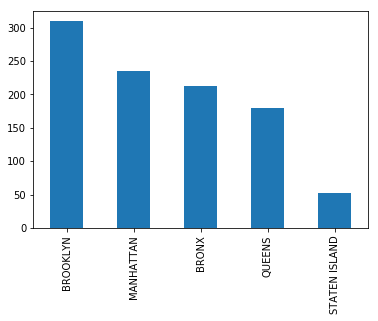

In [8]:
#Visualize the number of crimes in each borough. 
%matplotlib inline
df1['boro_nm'].value_counts().plot('bar')

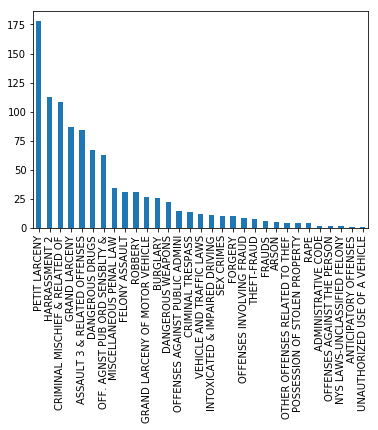

In [9]:
df['ofns_desc'].value_counts().plot('bar')

## According to the bar plot for number of crimes in each neighborhood, Brooklyn has the highest number of crimes, and Staten Island has the smallest number of crimes. 

In [44]:
!conda install -c conda-forge folium=0.5.0 --yes

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    folium-0.5.0               |             py_0          45 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    openssl-1.1.1f             |       h516909a_0         2.1 MB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    ------------------------------------------------------------
                       

In [45]:
from geopy.geocoders import Nominatim 


import matplotlib.cm as cm
import matplotlib.colors as colors


from sklearn.cluster import KMeans

import folium

In [46]:
address = 'New York, NY'

geolocator = Nominatim(user_agent="New York")
location = geolocator.geocode(address)
latitude_NYC = location.latitude
longitude_NYC = location.longitude
print('The geograpical coordinate of New York are {}, {}.'.format(latitude_NYC, longitude_NYC))

The geograpical coordinate of New York are 40.7127281, -74.0060152.


In [47]:
map_nyc = folium.Map(location=[latitude_NYC, longitude_NYC], zoom_start=10)

# add markers to map
for latitude, longitude, in zip (df1['latitude'], df1['longitude']):
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_nyc)  
    
map_nyc

## Based on the geographical map, it is obvious that the number of crimes is populated in Brooklyn and Manhattan. However, the upper west side of Manhattan shows low number of crimes. 

# Find the competitive place for the ramen shop. 

In [10]:
import lxml
import json
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
import math
import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
#from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

ModuleNotFoundError: No module named 'folium'

In [11]:
CLIENT_ID = 'KAYX3YWBGNXH4VL5PNY54LY4TCR2HSDNERMMSX0E12IT2K5E'
CLIENT_SECRET = '3S12U1FEZRVXAXKUDVZ3EWOMBWMVRFFVZR5XGPNDUCPT2I2I' 
VERSION = '20200401' 
radius=500
LIMIT=100

In [12]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url1 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
       
        results = requests.get(url1).json()["response"]['groups'][0]['items']
        
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [13]:
results = requests.get(url1).json()
results

NameError: name 'url1' is not defined

In [14]:
nyc_venues = getNearbyVenues(names=df1['boro_nm'],
                                   latitudes=df1['latitude'],
                                   longitudes=df1['longitude']
                                  )

BRONX
BROOKLYN
QUEENS
BROOKLYN
MANHATTAN
BROOKLYN
BRONX
BROOKLYN
MANHATTAN
BRONX
BROOKLYN
STATEN ISLAND
BROOKLYN
BROOKLYN
QUEENS
QUEENS
MANHATTAN
MANHATTAN
BROOKLYN
QUEENS
BROOKLYN
QUEENS
BROOKLYN
BRONX
MANHATTAN
BROOKLYN
BRONX
MANHATTAN
MANHATTAN
BRONX
BRONX
BROOKLYN
BROOKLYN
BROOKLYN
BROOKLYN
BRONX
BROOKLYN
QUEENS
BROOKLYN
BRONX
QUEENS
QUEENS
QUEENS
BROOKLYN
MANHATTAN
BRONX
MANHATTAN
MANHATTAN
QUEENS
QUEENS
BRONX
BRONX
BROOKLYN
MANHATTAN
QUEENS
BROOKLYN
QUEENS
BROOKLYN
STATEN ISLAND
BROOKLYN
QUEENS
QUEENS
BRONX
QUEENS
BRONX
QUEENS
QUEENS
MANHATTAN
BROOKLYN
BRONX
MANHATTAN
BROOKLYN
MANHATTAN
QUEENS
QUEENS
QUEENS
BROOKLYN
BROOKLYN
STATEN ISLAND
QUEENS
QUEENS
BRONX
QUEENS
MANHATTAN
QUEENS
BROOKLYN
BRONX
BRONX
MANHATTAN
BROOKLYN
BRONX
MANHATTAN
BROOKLYN
BROOKLYN
MANHATTAN
BROOKLYN
BRONX
BRONX
MANHATTAN
QUEENS
BRONX
BRONX
BRONX
BRONX
BRONX
MANHATTAN
QUEENS
BRONX
QUEENS
MANHATTAN
QUEENS
QUEENS
BROOKLYN
BROOKLYN
QUEENS
STATEN ISLAND
BROOKLYN
QUEENS
QUEENS
MANHATTAN
BROOKLYN
BROOKLYN
QUEENS


In [15]:
nyc_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
BRONX,5346,5346,5346,5346,5346,5346
BROOKLYN,11894,11894,11894,11894,11894,11894
MANHATTAN,19105,19105,19105,19105,19105,19105
QUEENS,5052,5052,5052,5052,5052,5052
STATEN ISLAND,748,748,748,748,748,748


In [16]:
nyc_onehot = pd.get_dummies(nyc_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
nyc_onehot['Neighbourhood'] = nyc_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [nyc_onehot.columns[-1]] + list(nyc_onehot.columns[:-1])
nyc_onehot.head(15)

,ATM,Accessories Store,Acupuncturist,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Terminal,Airport Tram,American Restaurant,Amphitheater,...,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit,Neighbourhood
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,BRONX
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,BRONX
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,BRONX
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,BRONX
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,BRONX
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,BRONX
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,BRONX
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,BRONX
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,BRONX
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,BRONX


In [17]:
nyc_grouped = nyc_onehot.groupby('Neighbourhood').mean().reset_index()
nyc_grouped

,Neighbourhood,ATM,Accessories Store,Acupuncturist,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Terminal,Airport Tram,American Restaurant,...,Well,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,BRONX,0.001496,0.001496,0.000000,0.000000,0.000000,0.003367,0.000000,0.000000,0.007108,...,0.000000,0.000000,0.000000,0.000935,0.000000,0.001309,0.001122,0.000374,0.001122,0.000748
1,BROOKLYN,0.000336,0.001093,0.000252,0.000084,0.000000,0.000841,0.000168,0.000000,0.010173,...,0.000084,0.000673,0.002522,0.013032,0.000252,0.001093,0.002690,0.009164,0.000000,0.000000
2,MANHATTAN,0.000000,0.000628,0.000209,0.000157,0.000209,0.002408,0.000000,0.000000,0.023135,...,0.000000,0.000837,0.010940,0.009369,0.000000,0.001256,0.002460,0.010783,0.000000,0.000000
3,QUEENS,0.000000,0.000396,0.000000,0.000000,0.000594,0.000198,0.000000,0.000396,0.006730,...,0.000000,0.000000,0.000990,0.004751,0.000000,0.000792,0.001386,0.002177,0.000000,0.000000
4,STATEN ISLAND,0.000000,0.010695,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014706,...,0.000000,0.000000,0.000000,0.001337,0.000000,0.004011,0.008021,0.001337,0.001337,0.000000


In [18]:
nyc_grouped['Restaurant']

0    0.007669
1    0.012023
2    0.009631
3    0.009303
4    0.010695
Name: Restaurant, dtype: float64

In [19]:
nyc_grouped['Ramen Restaurant']

0    0.000000
1    0.002186
2    0.004240
3    0.001584
4    0.000000
Name: Ramen Restaurant, dtype: float64

In [20]:
nyc_grouped['Japanese Restaurant']

0    0.000935
1    0.008996
2    0.012876
3    0.010293
4    0.005348
Name: Japanese Restaurant, dtype: float64

In [21]:
#Top 3 populated venues in each borough
num_top_venues = 3

for hood in nyc_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = nyc_grouped[nyc_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----BRONX----
                  venue  freq
0           Pizza Place  0.07
1            Donut Shop  0.05
2  Fast Food Restaurant  0.04


----BROOKLYN----
         venue  freq
0  Pizza Place  0.05
1  Coffee Shop  0.04
2          Bar  0.03


----MANHATTAN----
                venue  freq
0         Coffee Shop  0.04
1         Pizza Place  0.03
2  Italian Restaurant  0.03


----QUEENS----
                venue  freq
0         Pizza Place  0.05
1  Chinese Restaurant  0.04
2              Bakery  0.03


----STATEN ISLAND----
           venue  freq
0       Bus Stop  0.07
1    Pizza Place  0.06
2  Deli / Bodega  0.04




In [22]:
#Sort the venue in decending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [23]:
##List Top 10 venues in each neighbourhood
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = nyc_grouped['Neighbourhood']

for ind in np.arange(nyc_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(nyc_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,BRONX,Pizza Place,Donut Shop,Grocery Store,Fast Food Restaurant,Deli / Bodega,Pharmacy,Chinese Restaurant,Fried Chicken Joint,Sandwich Place,Spanish Restaurant
1,BROOKLYN,Pizza Place,Coffee Shop,Bar,Deli / Bodega,Bakery,Chinese Restaurant,Grocery Store,Caribbean Restaurant,Café,Mexican Restaurant
2,MANHATTAN,Coffee Shop,Italian Restaurant,Pizza Place,Hotel,American Restaurant,Theater,Bakery,Bar,Café,Mexican Restaurant
3,QUEENS,Pizza Place,Chinese Restaurant,Bakery,Deli / Bodega,Grocery Store,Korean Restaurant,Pharmacy,Donut Shop,Mexican Restaurant,Sandwich Place
4,STATEN ISLAND,Bus Stop,Pizza Place,Deli / Bodega,Italian Restaurant,Cosmetics Shop,Clothing Store,Bagel Shop,Sandwich Place,Chinese Restaurant,Liquor Store


In [54]:
# set number of clusters
kclusters = 3

nyc_grouped_clustering = nyc_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(nyc_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_ 
# to change use .astype()

array([0, 1, 1, 1, 2], dtype=int32)

In [58]:
neighbourhoods_venues_sorted.head()

,Cluster_Labels,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,BRONX,Pizza Place,Donut Shop,Grocery Store,Fast Food Restaurant,Deli / Bodega,Pharmacy,Chinese Restaurant,Fried Chicken Joint,Sandwich Place,Spanish Restaurant
1,1,BROOKLYN,Pizza Place,Coffee Shop,Bar,Deli / Bodega,Bakery,Chinese Restaurant,Grocery Store,Caribbean Restaurant,Café,Mexican Restaurant
2,1,MANHATTAN,Coffee Shop,Italian Restaurant,Pizza Place,Hotel,American Restaurant,Theater,Bakery,Bar,Café,Mexican Restaurant
3,1,QUEENS,Pizza Place,Chinese Restaurant,Bakery,Deli / Bodega,Grocery Store,Korean Restaurant,Pharmacy,Donut Shop,Mexican Restaurant,Sandwich Place
4,2,STATEN ISLAND,Bus Stop,Pizza Place,Deli / Bodega,Italian Restaurant,Cosmetics Shop,Clothing Store,Bagel Shop,Sandwich Place,Chinese Restaurant,Liquor Store


In [60]:
nyc_merged = df1

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
nyc_merged = nyc_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='boro_nm')

nyc_merged.head() 

,boro_nm,latitude,longitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,BRONX,40.827414,-73.877946,0,Pizza Place,Donut Shop,Grocery Store,Fast Food Restaurant,Deli / Bodega,Pharmacy,Chinese Restaurant,Fried Chicken Joint,Sandwich Place,Spanish Restaurant
1,BROOKLYN,40.637097,-74.006105,1,Pizza Place,Coffee Shop,Bar,Deli / Bodega,Bakery,Chinese Restaurant,Grocery Store,Caribbean Restaurant,Café,Mexican Restaurant
2,QUEENS,40.679260,-73.841500,1,Pizza Place,Chinese Restaurant,Bakery,Deli / Bodega,Grocery Store,Korean Restaurant,Pharmacy,Donut Shop,Mexican Restaurant,Sandwich Place
3,BROOKLYN,40.687402,-73.940369,1,Pizza Place,Coffee Shop,Bar,Deli / Bodega,Bakery,Chinese Restaurant,Grocery Store,Caribbean Restaurant,Café,Mexican Restaurant
4,MANHATTAN,40.831576,-73.942983,1,Coffee Shop,Italian Restaurant,Pizza Place,Hotel,American Restaurant,Theater,Bakery,Bar,Café,Mexican Restaurant


In [61]:
nyc_merged['Cluster_Labels'] = nyc_merged.Cluster_Labels.astype(int)

In [62]:
# create map
map_clusters = folium.Map(location=[latitude_NYC, longitude_NYC], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nyc_merged['latitude'], nyc_merged['longitude'], nyc_merged['boro_nm'], nyc_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [63]:
#Details for Cluster 1
nyc_merged.loc[nyc_merged['Cluster_Labels'] == 0, nyc_merged.columns[[1] + list(range(3, nyc_merged.shape[1]))]]

,latitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,40.827414,0,Pizza Place,Donut Shop,Grocery Store,Fast Food Restaurant,Deli / Bodega,Pharmacy,Chinese Restaurant,Fried Chicken Joint,Sandwich Place,Spanish Restaurant
6,40.819127,0,Pizza Place,Donut Shop,Grocery Store,Fast Food Restaurant,Deli / Bodega,Pharmacy,Chinese Restaurant,Fried Chicken Joint,Sandwich Place,Spanish Restaurant
9,40.861392,0,Pizza Place,Donut Shop,Grocery Store,Fast Food Restaurant,Deli / Bodega,Pharmacy,Chinese Restaurant,Fried Chicken Joint,Sandwich Place,Spanish Restaurant
24,40.828767,0,Pizza Place,Donut Shop,Grocery Store,Fast Food Restaurant,Deli / Bodega,Pharmacy,Chinese Restaurant,Fried Chicken Joint,Sandwich Place,Spanish Restaurant
27,40.840930,0,Pizza Place,Donut Shop,Grocery Store,Fast Food Restaurant,Deli / Bodega,Pharmacy,Chinese Restaurant,Fried Chicken Joint,Sandwich Place,Spanish Restaurant
30,40.840627,0,Pizza Place,Donut Shop,Grocery Store,Fast Food Restaurant,Deli / Bodega,Pharmacy,Chinese Restaurant,Fried Chicken Joint,Sandwich Place,Spanish Restaurant
31,40.841695,0,Pizza Place,Donut Shop,Grocery Store,Fast Food Restaurant,Deli / Bodega,Pharmacy,Chinese Restaurant,Fried Chicken Joint,Sandwich Place,Spanish Restaurant
36,40.829155,0,Pizza Place,Donut Shop,Grocery Store,Fast Food Restaurant,Deli / Bodega,Pharmacy,Chinese Restaurant,Fried Chicken Joint,Sandwich Place,Spanish Restaurant
40,40.887451,0,Pizza Place,Donut Shop,Grocery Store,Fast Food Restaurant,Deli / Bodega,Pharmacy,Chinese Restaurant,Fried Chicken Joint,Sandwich Place,Spanish Restaurant
47,40.848674,0,Pizza Place,Donut Shop,Grocery Store,Fast Food Restaurant,Deli / Bodega,Pharmacy,Chinese Restaurant,Fried Chicken Joint,Sandwich Place,Spanish Restaurant


In [64]:
#Cluster 2
nyc_merged.loc[nyc_merged['Cluster_Labels'] == 1, nyc_merged.columns[[1] + list(range(3, nyc_merged.shape[1]))]]

,latitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,40.637097,1,Pizza Place,Coffee Shop,Bar,Deli / Bodega,Bakery,Chinese Restaurant,Grocery Store,Caribbean Restaurant,Café,Mexican Restaurant
2,40.679260,1,Pizza Place,Chinese Restaurant,Bakery,Deli / Bodega,Grocery Store,Korean Restaurant,Pharmacy,Donut Shop,Mexican Restaurant,Sandwich Place
3,40.687402,1,Pizza Place,Coffee Shop,Bar,Deli / Bodega,Bakery,Chinese Restaurant,Grocery Store,Caribbean Restaurant,Café,Mexican Restaurant
4,40.831576,1,Coffee Shop,Italian Restaurant,Pizza Place,Hotel,American Restaurant,Theater,Bakery,Bar,Café,Mexican Restaurant
5,40.643368,1,Pizza Place,Coffee Shop,Bar,Deli / Bodega,Bakery,Chinese Restaurant,Grocery Store,Caribbean Restaurant,Café,Mexican Restaurant
7,40.673329,1,Pizza Place,Coffee Shop,Bar,Deli / Bodega,Bakery,Chinese Restaurant,Grocery Store,Caribbean Restaurant,Café,Mexican Restaurant
8,40.849415,1,Coffee Shop,Italian Restaurant,Pizza Place,Hotel,American Restaurant,Theater,Bakery,Bar,Café,Mexican Restaurant
10,40.638923,1,Pizza Place,Coffee Shop,Bar,Deli / Bodega,Bakery,Chinese Restaurant,Grocery Store,Caribbean Restaurant,Café,Mexican Restaurant
12,40.676902,1,Pizza Place,Coffee Shop,Bar,Deli / Bodega,Bakery,Chinese Restaurant,Grocery Store,Caribbean Restaurant,Café,Mexican Restaurant
13,40.662856,1,Pizza Place,Coffee Shop,Bar,Deli / Bodega,Bakery,Chinese Restaurant,Grocery Store,Caribbean Restaurant,Café,Mexican Restaurant


In [66]:
#Cluster 3
nyc_merged.loc[nyc_merged['Cluster_Labels'] == 2, nyc_merged.columns[[1] + list(range(3, nyc_merged.shape[1]))]]

,latitude,Cluster_Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,40.591872,2,Bus Stop,Pizza Place,Deli / Bodega,Italian Restaurant,Cosmetics Shop,Clothing Store,Bagel Shop,Sandwich Place,Chinese Restaurant,Liquor Store
61,40.528464,2,Bus Stop,Pizza Place,Deli / Bodega,Italian Restaurant,Cosmetics Shop,Clothing Store,Bagel Shop,Sandwich Place,Chinese Restaurant,Liquor Store
81,40.621570,2,Bus Stop,Pizza Place,Deli / Bodega,Italian Restaurant,Cosmetics Shop,Clothing Store,Bagel Shop,Sandwich Place,Chinese Restaurant,Liquor Store
118,40.573850,2,Bus Stop,Pizza Place,Deli / Bodega,Italian Restaurant,Cosmetics Shop,Clothing Store,Bagel Shop,Sandwich Place,Chinese Restaurant,Liquor Store
134,40.623816,2,Bus Stop,Pizza Place,Deli / Bodega,Italian Restaurant,Cosmetics Shop,Clothing Store,Bagel Shop,Sandwich Place,Chinese Restaurant,Liquor Store
146,40.605687,2,Bus Stop,Pizza Place,Deli / Bodega,Italian Restaurant,Cosmetics Shop,Clothing Store,Bagel Shop,Sandwich Place,Chinese Restaurant,Liquor Store
156,40.633366,2,Bus Stop,Pizza Place,Deli / Bodega,Italian Restaurant,Cosmetics Shop,Clothing Store,Bagel Shop,Sandwich Place,Chinese Restaurant,Liquor Store
160,40.628949,2,Bus Stop,Pizza Place,Deli / Bodega,Italian Restaurant,Cosmetics Shop,Clothing Store,Bagel Shop,Sandwich Place,Chinese Restaurant,Liquor Store
175,40.547759,2,Bus Stop,Pizza Place,Deli / Bodega,Italian Restaurant,Cosmetics Shop,Clothing Store,Bagel Shop,Sandwich Place,Chinese Restaurant,Liquor Store
190,40.638984,2,Bus Stop,Pizza Place,Deli / Bodega,Italian Restaurant,Cosmetics Shop,Clothing Store,Bagel Shop,Sandwich Place,Chinese Restaurant,Liquor Store


# Result 

## Based on NYPD complaint data, the bar chart and map show Staten Island is the safest borough in New York City since the smallest number of crimes were recorded among three other boroughs, The Bronx, Manhattan, and Queens. Moreover, the foursquare data shows that the highest number of the restaurant exists in Manhattan, and Staten Island has the least number of restaurants. There are more Japanese restaurants in Manhattan and Brooklyn than two other boroughs, The Bronx and Queens. Ramen restaurants are more common in Manhattan and Brooklyn. In terms of competition, Staten Island is less likely to be competitive and the safest borough among five boroughs for a new ramen shop. Cluster analysis revelaed that Manhattan, Queens and Brooklyn areas have a lot of restaurants (Pizza place, coffee shop, bar...etc) and The Bronx area's most populated venue is the pizza place, doughnut shop, and grocery store..etc. Non restaurants venues are more populated in Staten Island, although pizza place and italian restaurant are popular in the area. For a ramen shop, there are less competitive and more opportunity for the restaurant location. Therefore, the best place to locate a new ramen shop would be in Staten Island.



# Discussion

## There are some limitations to this analysis. This study did not include the population of the area. High populated areas are more likely to have a higher number of crimes. So, the safest neighborhood cannot be defined by the only number of crimes, and other factors make the area safe or dangerous. Although the smallest number of restaurants/Japanese restaurants/Ramen Restaurants in the area defines the less competition, the less competition is not the only aspect for the successful restaurant. For example, ramen is still a newcomer to the restaurant industry, and it is not familiar for some people. In general, ramen is more common for people who have an Asian background. This analysis does not include culture and demography.

# Conclusion

## Staten Island is the best place for a new ramen shop to open in New York City. Staten Island shows the least number of crimes occured, and the least number of restaurants and ramen shop among the borough. For the future analysis, the study should include other factors which can lead the successful of the establishing a business such as population in the area. 

# Reference

NYPD Complaint Data Historical, retrieved from: https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i